# Laboratorio 6
### Minería de texto
- Daniel Gomez 21429
- Abner Garcia 21285

### Inciso 1
Descargue el archivo train.csv

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import pandas as pd
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Personal\AppData\Local\Temp\ipykernel_2764\1646341236.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Inciso 2
Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje.

In [2]:
train = pd.read_csv('./data/train.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


### Inciso 3
Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento que llevó a cabo.
3.1. Se pueden hacer tareas como:
- Convertir el texto a mayúsculas o a minúsculas
- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.
- Quitar las url
- Revisar si hay emoticones y quitarlos
- Quitar los signos de puntuación
- Quitar los artículos, preposiciones y conjunciones (stopwords)
- Quitar números si considera que interferirá en la clasificación (quizá debería valorar si quitar o no el 911).

In [5]:
# Convertir el texto a minúsculas
train = train.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

# imprimir data set
print(train)

         id keyword location  \
0         1     nan      nan   
1         4     nan      nan   
2         5     nan      nan   
3         6     nan      nan   
4         7     nan      nan   
...     ...     ...      ...   
7608  10869     nan      nan   
7609  10870     nan      nan   
7610  10871     nan      nan   
7611  10872     nan      nan   
7612  10873     nan      nan   

                                                   text  target  
0     our deeds are the reason of this #earthquake m...       1  
1                forest fire near la ronge sask. canada       1  
2     all residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     just got sent this photo from ruby #alaska as ...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @thetawniest the out of control w...       1  
7610  m1.94 [01:04 ut

Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes

In [6]:
# Quitando los carateres especiales como #, @ o apostrofes
def clean_text(text):
    if isinstance(text, str):
       # eliminando caracteres especiales
         cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
         return cleaned_text
    else:
        return text
  
# Aplicando la función clean_text a la columna text
train = train.applymap(clean_text)

# imprimir data set
print(train)

         id keyword location  \
0         1     nan      nan   
1         4     nan      nan   
2         5     nan      nan   
3         6     nan      nan   
4         7     nan      nan   
...     ...     ...      ...   
7608  10869     nan      nan   
7609  10870     nan      nan   
7610  10871     nan      nan   
7611  10872     nan      nan   
7612  10873     nan      nan   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                 forest fire near la ronge sask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary thetawniest the out of control wild...       1  
7610  m194 0104 utc5k

C:\Users\Personal\AppData\Local\Temp\ipykernel_2764\2091921618.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(clean_text)


Describiendo los datos para validar que todo haya quedad con el formato correcto.

In [7]:
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['text'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe()

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)

Estadísticas de longitud de textos:
 count    7613.000000
mean       94.023512
std        31.774947
min         6.000000
25%        71.000000
50%        99.000000
75%       123.000000
max       148.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en base al texto: 3129


Diseñando estadísticas del data set y aplicando palabras más frecuentes en el csv

Estadísticas de longitud de textos:
 count    7613.000000
mean        8.533824
std         3.208316
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en la ubicación: 3129
Estadísticas de longitud de textos:
 count    7613.000000
mean        8.533824
std         3.208316
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en base al texto: 3129


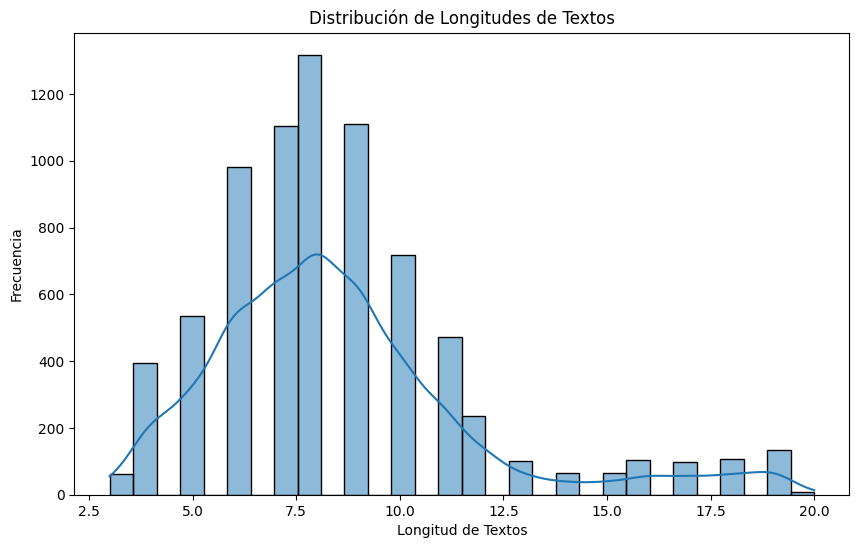

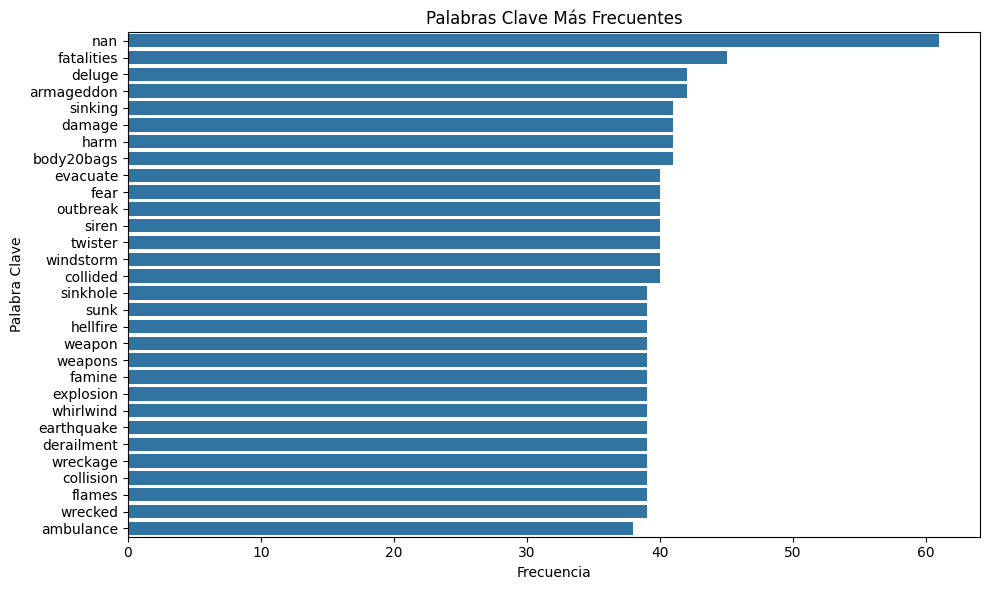

In [8]:
%matplotlib inline
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['keyword'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe() # Obteniendo estadísticas sobre las longitudes de los textos en la columna "keyword"

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en la ubicación:", location_unique_count)

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)


# Gráfico de histograma de longitudes de textos
plt.figure(figsize=(10, 6))
sns.histplot(train['tweet_length'], bins=30, kde=True)
plt.title('Distribución de Longitudes de Textos')
plt.xlabel('Longitud de Textos')
plt.ylabel('Frecuencia')
plt.show()


# Calcular la frecuencia de las palabras clave
keyword_freq = train['keyword'].value_counts()

# Seleccionar las palabras clave más frecuentes.
top_keywords = keyword_freq.head(30)

# Crear un gráfico de barras de las palabras clave más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords.values, y=top_keywords.index)
plt.title('Palabras Clave Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra Clave')
plt.tight_layout()
plt.show()

### Inciso 4
Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. ¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?¿Vale la pena explorar bigramas o trigramas para analizar el contexto?

In [9]:
# Obtener la frecuencia de las palabras en los tweets de desastres
disaster_tweets = train[train['target'] == 1]['text']
disaster_tweets = disaster_tweets.str.split(expand=True).stack().value_counts()
disaster_tweets

the                  1362
in                   1161
of                    927
a                     926
to                    757
                     ... 
httptco7giglwdmhy       1
medic                   1
ethereal7               1
jeesss                  1
httptcoymy4rskq3d       1
Name: count, Length: 11848, dtype: int64

In [10]:
# Obtener la frecuencia de las palabras en los tweets que no son de desastres
non_disaster_tweets = train[train['target'] == 0]['text']
non_disaster_tweets = non_disaster_tweets.str.split(expand=True).stack().value_counts()
non_disaster_tweets

the                   1909
a                     1257
to                    1189
i                     1078
and                    918
                      ... 
electro                  1
violin                   1
psalm3422                1
joshacagan               1
httpstcotfgrayudc5       1
Name: count, Length: 14623, dtype: int64

### Inciso 5
Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis

In [11]:
train = pd.read_csv('./data/train.csv')
analysis = ProfileReport(train)
analysis.to_file('analysis.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 220.95it/s]
